# K-Nearest Neighbors

KNN is a **non-parametric** algorithm used for classification and regression tasks.
It works by finding the K closest data points in the training set to a new data point
 and assigning the new point the class label that is most common among the K neighbors.

Load the dataset and set-up code:

In [54]:
# Set up notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home_directory = "C:/Users/rober/DataspellProjects/Machine-Learning-Sandbox"

pokedex = pd.read_csv(
    filepath_or_buffer=home_directory + "/data/01_pokemon/pokemon_go.csv"
)

# Features (numpy arrays)
X = pokedex[["MaxHP", "Capture_rate", "Stamina", "Attack", "Defense"]].values
# Target variable (numpy arrays)
y = pokedex[["Legendary"]].values

print(X.shape, y.shape)

(649, 5) (649, 1)


## Split the dataset

First, we are splitting our data into training and testing sets using
`train_test_split()` function from scikit-learn library. The `stratify` parameter
ensures that the proportion of classes in the training and testing sets remains the
same as in the original dataset. This is useful to make sure we are not biased
towards one class during training.

In [55]:
# Train/Test Split
from sklearn.model_selection import train_test_split

# We use 'stratify' to represent the same proportion of labels on the test and the train
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=21, stratify=y
)

Here `X` is the feature matrix and `y` is the target variable. `test_size=0.2`
specifies that we want to use 20% of the data for testing, while the remaining 80%
will be used for training. The `random_state` parameter is used to ensure
reproducibility, while `stratify=y` ensures that the classes are proportionally
represented in the train-test split.

## Standardize the data

KNN is a distance-based algorithm, which means that it is sensitive to the scale of
the features. Therefore, it is a good practice to standardize the data so that each
feature has a mean of 0 and standard deviation of 1. We can use the `StandardScaler`
function from scikit-learn to standardize the data.


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

Once the data is preprocessed, we can train the KNN model on the training set. We can
 use the `KNeighborsClassifier` class from scikit-learn to train the model.

Here, we are instantiating the `KNeighborsClassifier` class from scikit-learn and
setting the number of neighbors to 10.

In [57]:
# Instantiate classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

We then fit our model on the training data using the `fit()` function.

In [58]:
knn.fit(X_train_scaled, y_train)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

## Evaluate the model

We calculate the accuracy of our model using the `score()` function on our test data.

In [59]:
accuracy = knn.score(X_test_scaled, y_test)

not_legendary = pokedex.groupby("Legendary")["Legendary"].count()[0]
legendary = pokedex.groupby("Legendary")["Legendary"].count()[1]

print(f"Accuracy : {accuracy}, Ratio: {not_legendary/(legendary+not_legendary)}")

Accuracy : 0.9538461538461539, Ratio: 0.9399075500770416


Notice that the accuracy is low considering that 93% of the labels are from not
legendary Pokemons.

- Larger k -> less complex model -> can cause underfitting
- Smaller k -> more complex model -> can lead to overfitting

## Bootstrapping

Next, we perform a bootstrap by training multiple models with different numbers of
neighbors and calculate the training and testing accuracies for each model.

In [60]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 20)

for neighbor in neighbors:
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Fit
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    # Evaluate
    train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)

print(
    f"Neighbors: {neighbors} \n Train accuracies: {train_accuracies} \n Test "
    f"accuracies: {test_accuracies}"
)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Neighbors: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 
 Train accuracies: {1: 0.9922928709055877, 2: 0.9788053949903661, 3: 0.9710982658959537, 4: 0.976878612716763, 5: 0.9710982658959537, 6: 0.9653179190751445, 7: 0.9653179190751445, 8: 0.9633911368015414, 9: 0.9653179190751445, 10: 0.9653179190751445, 11: 0.9653179190751445, 12: 0.9556840077071291, 13: 0.9595375722543352, 14: 0.9576107899807321, 15: 0.9556840077071291, 16: 0.9518304431599229, 17: 0.9499036608863198, 18: 0.9556840077071291, 19: 0.953757225433526} 
 Test accuracies: {1: 0.9615384615384616, 2: 0.9538461538461539, 3: 0.9615384615384616, 4: 0.9769230769230769, 5: 0.9615384615384616, 6: 0.9615384615384616, 7: 0.9615384615384616, 8: 0.9538461538461539, 9: 0.9538461538461539, 10: 0.9538461538461539, 11: 0.9538461538461539, 12: 0.9538461538461539, 13: 0.9615384615384616, 14: 0.9615384615384616, 15: 0.9615384615384616, 16: 0.9538461538461539, 17: 0.9538461538461539, 18: 0.9538461538461539, 19: 0.953846153846153

C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Here, `np.arange` creates a range of numbers, which are the values we want to test
for the number of neighbors in our KNN model. We then loop through each value of
neighbor and fit a new `KNeighborsClassifier` model with that value. We then
calculate and store the training and testing accuracies for each model.

Look at the next plot, on the Testing Accuracy **as k increases beyond `4` we see
overfitting where performance plateaus on both test and training sets, as indicated in this plot**.

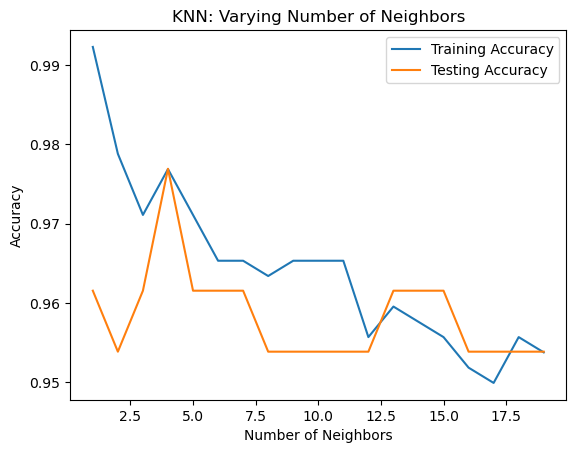

In [61]:
plt.figure()
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.title("KNN: Varying Number of Neighbors")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

## References

As a reference from the transcript of the CS 229S Stanford Machine Learning course, lecture notes on K-Nearest Neighbors are available at:
<http://cs229.stanford.edu/notes/cs229-notes1.pdf>.